<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/drowsiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/dataset_new.zip 

Archive:  /content/dataset_new.zip
   creating: dataset_new/
   creating: dataset_new/test/
   creating: dataset_new/test/no_yawn/
  inflating: dataset_new/test/no_yawn/1004.jpg  
  inflating: dataset_new/test/no_yawn/1007.jpg  
  inflating: dataset_new/test/no_yawn/1010.jpg  
  inflating: dataset_new/test/no_yawn/1033.jpg  
  inflating: dataset_new/test/no_yawn/1044.jpg  
  inflating: dataset_new/test/no_yawn/1050.jpg  
  inflating: dataset_new/test/no_yawn/1063.jpg  
  inflating: dataset_new/test/no_yawn/1067.jpg  
  inflating: dataset_new/test/no_yawn/1096.jpg  
  inflating: dataset_new/test/no_yawn/1114.jpg  
  inflating: dataset_new/test/no_yawn/1118.jpg  
  inflating: dataset_new/test/no_yawn/1129.jpg  
  inflating: dataset_new/test/no_yawn/113.jpg  
  inflating: dataset_new/test/no_yawn/1134.jpg  
  inflating: dataset_new/test/no_yawn/115.jpg  
  inflating: dataset_new/test/no_yawn/1213.jpg  
  inflating: dataset_new/test/no_yawn/1267.jpg  
  inflating: dataset_new/test/no_yawn/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -r /content/drive/MyDrive/archive/dataset_new/test/Closed

rm: cannot remove '/content/drive/MyDrive/archive/dataset_new/test/Closed': No such file or directory


In [ ]:
!rm -r /content/drive/MyDrive/archive/dataset_new/test/Open

rm: cannot remove '/content/drive/MyDrive/archive/dataset_new/test/Open': No such file or directory


In [ ]:
!rm -r /content/drive/MyDrive/archive/dataset_new/train/Closed

rm: cannot remove '/content/drive/MyDrive/archive/dataset_new/train/Closed': No such file or directory


In [ ]:
!rm -r /content/drive/MyDrive/archive/dataset_new/train/Open

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [20]:
!rm -r /content/drowsiness_cropped/test/.ipynb_checkpoints

rm: cannot remove '/content/drowsiness_cropped/test/.ipynb_checkpoints': No such file or directory


In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1310 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 215 images belonging to 2 classes.


In [9]:
im=plt.imread("/content/drive/MyDrive/archive/dataset_new/train/yawn/11.jpg")


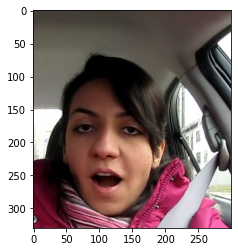

In [10]:
plt.imshow(im[20:350, 200:500, :])

In [11]:
import os

In [12]:
import glob
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/test/no_yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/test/no_yawn" , f'test_images_noyawn{i}.jpg'), im)

In [13]:
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/test/yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/test/yawn" , f'test_images_yawn{i}.jpg'), im)

In [14]:
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/train/no_yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/train/no_yawn" , f'train_images_noyawn{i}.jpg'), im)

In [15]:
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/train/yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/train/yawn" , f'train_images_yawn{i}.jpg'), im)

In [16]:
# Add the image to a batch
from keras.preprocessing import image
from tensorflow.keras import layers
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test")



Found 215 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


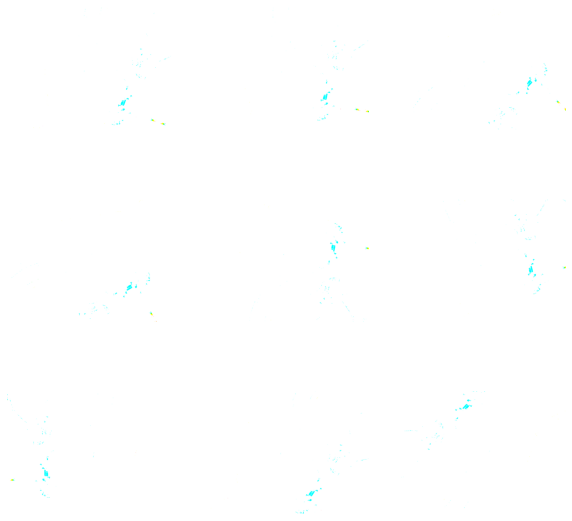

In [17]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [18]:
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")

Found 1310 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


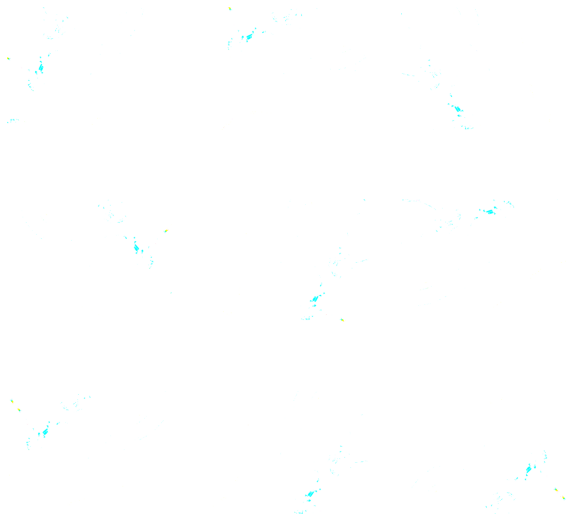

In [19]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [20]:
#build CNN model
#intialize
cnn=tf.keras.models.Sequential()

In [21]:
from tensorflow.keras import layers

In [22]:
#convolution
from keras.regularizers import l2
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],
                               kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))





In [23]:
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.3))

In [24]:
#add one more layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],
       kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3],
       kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [26]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

In [27]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [28]:
#Output layer
cnn.add(tf.keras.layers.Dense(units=2,activation='sigmoid'))

In [29]:
#Compile the model
cnn.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [30]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [31]:
history=cnn.fit(x=train_generator,validation_data=validation_generator,epochs=50)

Epoch 1/50
41/41 [==============================] - 6s 145ms/step - loss: 0.8653 - accuracy: 0.5137 - val_loss: 0.7839 - val_accuracy: 0.5023
Epoch 3/50
41/41 [==============================] - 6s 144ms/step - loss: 0.7454 - accuracy: 0.5389 - val_loss: 0.7235 - val_accuracy: 0.5256
Epoch 4/50
41/41 [==============================] - 6s 145ms/step - loss: 0.6967 - accuracy: 0.5786 - val_loss: 0.6986 - val_accuracy: 0.5814
Epoch 5/50
41/41 [==============================] - 6s 144ms/step - loss: 0.6738 - accuracy: 0.6214 - val_loss: 0.6985 - val_accuracy: 0.5767
Epoch 6/50
41/41 [==============================] - 6s 144ms/step - loss: 0.6682 - accuracy: 0.6237 - val_loss: 0.6937 - val_accuracy: 0.5767
Epoch 7/50
41/41 [==============================] - 6s 144ms/step - loss: 0.6495 - accuracy: 0.6382 - val_loss: 0.6914 - val_accuracy: 0.5907
Epoch 8/50
41/41 [==============================] - 6s 146ms/step - loss: 0.6532 - accuracy: 0.6481 - val_loss: 0.6769 - val_accuracy: 0.5953
Epoch 

In [32]:
print(cnn.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [194]:
from sklearn.metrics import confusion_matrix
from array import array
y_true = ["open", "no yawn"]
y_pred = ["yawn","no yawn"]
confusion_matrix(y_true, y_pred, labels=["yawn", "no yawn"])
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

TypeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


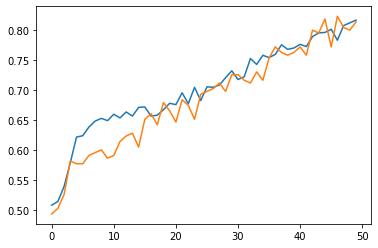

In [61]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

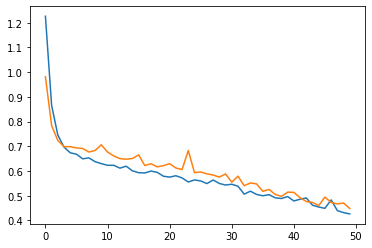

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [64]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test/no_yawn/test_images_noyawn1.jpg',target_size=(64,64))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction='yawn'
if result[0][1]==1:
    prediction='no yawn'

In [65]:
prediction

'no yawn'

In [66]:
 train_generator.class_indices
    

{'no_yawn': 0, 'yawn': 1}

In [67]:
result


array([[0., 1.]], dtype=float32)

In [81]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as pl

In [85]:
image_size = [224,224]

In [86]:
train_path = '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train'
valid_path = '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test'

In [127]:
# Add the image to a batch
from keras.preprocessing import image
from tensorflow.keras import layers
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test")

Found 215 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


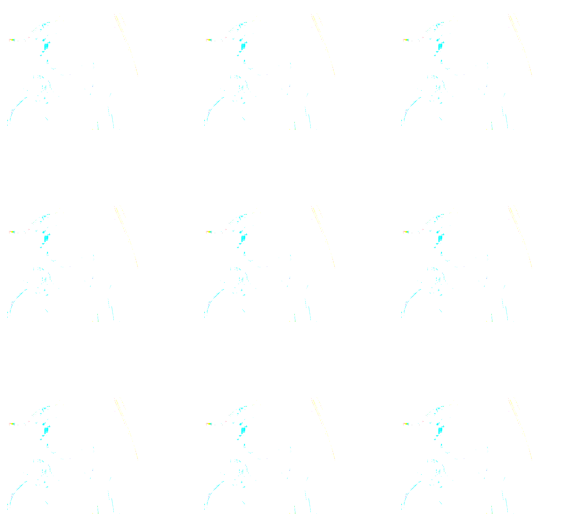

In [128]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [129]:
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")

Found 1310 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


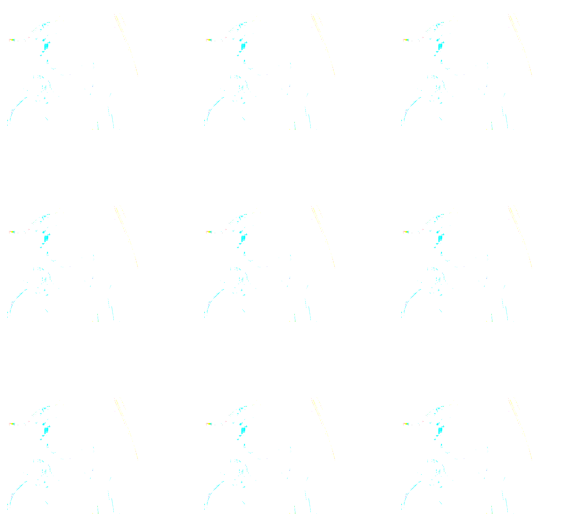

In [130]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [131]:
vgg = VGG16(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [132]:
 # don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [157]:
# useful for getting number of classes
folders = glob("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")
print(len(folders))

1


In [158]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [159]:
for layer in vgg.layers:
  layer.trainable = False

In [171]:
#  layers 
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [172]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [173]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [174]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [175]:
# view the structure of the model
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [177]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='SGD',
  metrics=['accuracy'])

In [178]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [179]:
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1310 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [180]:
# fit the model
r = model.fit_generator(training_set, validation_data=test_set,epochs=20,steps_per_epoch=len(training_set), validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
41/41 [==============================] - 21s 489ms/step - loss: 8.2570 - accuracy: 0.5000 - val_loss: 11.7355 - val_accuracy: 0.4930
Epoch 2/20
41/41 [==============================] - 20s 480ms/step - loss: 7.5051 - accuracy: 0.5000 - val_loss: 8.3732 - val_accuracy: 0.4930
Epoch 3/20
41/41 [==============================] - 20s 480ms/step - loss: 5.5636 - accuracy: 0.5000 - val_loss: 1.5636 - val_accuracy: 0.4930
Epoch 4/20
41/41 [==============================] - 20s 482ms/step - loss: 4.3351 - accuracy: 0.5000 - val_loss: 3.9661 - val_accuracy: 0.4930
Epoch 5/20
41/41 [==============================] - 20s 477ms/step - loss: 4.5766 - accuracy: 0.5000 - val_loss: 11.8104 - val_accuracy: 0.4930
Epoch 6/20
41/41 [==============================] - 20s 478ms/step - loss: 3.6435 - accuracy: 0.5000 - val_loss: 1.0127 - val_accuracy: 0.4930
Epoch 7/20
41/41 [==============================] - 20s 478ms/step - loss: 2.8350 - accuracy: 0.5000 - val_loss: 0.9985 - val_accuracy: 0.49

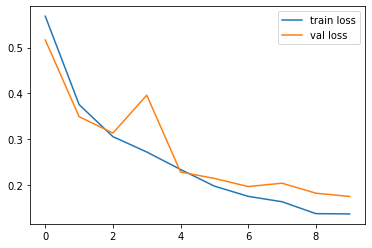

<Figure size 432x288 with 0 Axes>

In [150]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

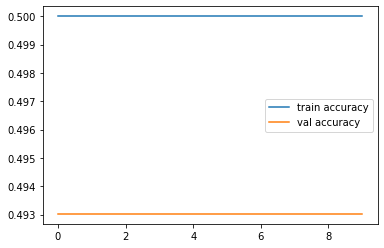

In [154]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()